# Step 1: Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor

# Step 2: Importing the dataset

In [2]:
data = pd.read_csv('insurance (1).csv')
data

,age,sex,bmi,classif,children,smoker,region,charges
0,19,female,27.900,PREO,0,yes,southwest,16884.92400
1,18,male,33.770,OB1,1,no,southeast,1725.55230
2,28,male,33.000,OB1,3,no,southeast,4449.46200
3,0,male,22.705,N,0,no,northwest,21984.47061
4,32,male,28.880,PREO,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,OB1,3,no,northwest,10600.54830
1334,18,female,31.920,OB1,0,no,northeast,2205.98080
1335,18,female,36.850,OB2,0,no,southeast,1629.83350
1336,21,female,25.800,PREO,0,no,southwest,2007.94500


### Understanding Data

In [3]:
# describe

data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.133782,30.663397,1.094918,13270.422265
std,14.958658,6.098187,1.205493,12110.011237
min,-58.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,190.000000,53.130000,5.000000,63770.428010


In [4]:
# data information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   classif   1330 non-null   object 
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 83.8+ KB


In [5]:
# columns of data

data.columns

Index(['age', 'sex', 'bmi', 'classif', 'children', 'smoker', 'region',
       'charges'],
      dtype='object')

In [6]:
# data type

data.dtypes

age           int64
sex          object
bmi         float64
classif      object
children      int64
smoker       object
region       object
charges     float64
dtype: object

# Step 3: Taking care of the missing data



In [7]:
# check for missing values
data.isnull().sum()

age         0
sex         0
bmi         0
classif     8
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
data.classif.isnull().sum()

8

In [9]:
# finding position of row index with null values

ind_null = data[data['classif'].isnull()].index.tolist()
ind_null

[15, 74, 128, 173, 559, 671, 839, 1331]

In [10]:
# filling the null values according to index

for i in ind_null:
    if(int(data.iloc[i]['bmi'])<18):
        data.at[i,'classif']="UW"
        
    elif(int(data.iloc[i]['bmi']) in range(18,25)):
        data.at[i,'classif']="N"
        
    elif(int(data.iloc[i]['bmi'])in range(25,30)):
        data.at[i,'classif']="PREO"
        
    elif(int(data.iloc[i]['bmi']) in range(30,35)):
        data.at[i,'classif']="OB1"
        
    elif(int(data.iloc[i]['bmi'])in range(35,40)):
        data.at[i,'classif']="OB2"
        
    elif(int(data.iloc[i]['bmi'])>40):
        data.at[i,'classif']="OB3"
        
# printing the null values

for i in ind_null:
    print(data.iloc[i]['classif'])

N
PREO
UW
OB1
OB2
OB1
OB1
OB1


# Step 4: Removing duplicates



In [11]:
# checking for duplicate values
data[data.duplicated()]

,age,sex,bmi,classif,children,smoker,region,charges
581,19,male,30.59,OB1,0,no,northwest,1639.5631


In [12]:
# dropping duplicate values

data.drop_duplicates(keep='last',inplace=True)

# Step 5: Separating categorical and numerical columns


In [13]:
# seprating categorical to numerical 

def separate_data_types(data):
    categorical=[]
    continuous=[]
    for column in data.columns:
        if data[column].nunique()<10:
            categorical.append(column)
        else:
            continuous.append(column)
    return categorical,continuous


In [14]:
categorical,continuous=separate_data_types(data)

table=[categorical,continuous]
print(tabulate({"categorical":categorical,
                "continuous":continuous},headers=["categorical","continuous"]))

categorical    continuous
-------------  ------------
sex            age
classif        bmi
children       charges
smoker
region


In [15]:
print (continuous)

['age', 'bmi', 'charges']


In [16]:
print(categorical)

['sex', 'classif', 'children', 'smoker', 'region']


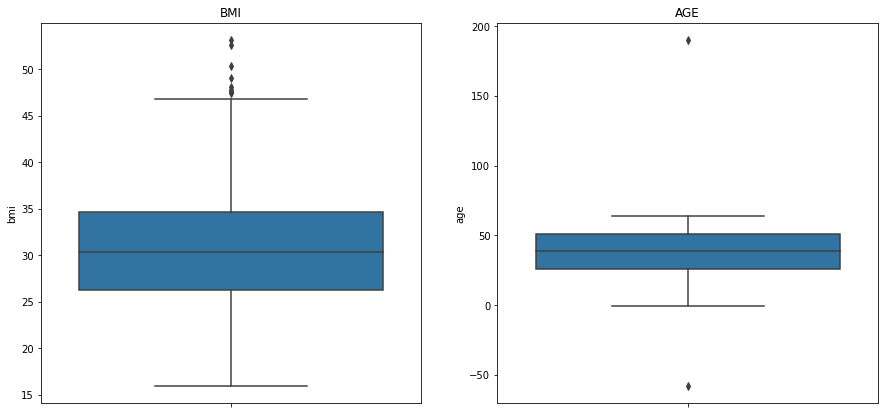

In [17]:
# creating boxplot

fig,ax=plt.subplots(1,2,figsize=(15,7))
sns.boxplot(y=data['bmi'],ax=ax[0]).set(title='BMI')
sns.boxplot(y=data['age'],ax=ax[1]).set(title='AGE')
plt.show()

# Step 6: Outlier Treatment

In [18]:
# removing outliers
print('row and columns before removing outliers:',data.shape)
print('wait till shape after removing outlier is printed...')

def myOutliers(data1,col):
    q3=np.quantile(data1[col],0.75)
    q1=np.quantile(data1[col],0.25)
    iqr=q3-q1
    
    global mylist
    global my_outlier_data
    
    lower_range=q1-1.5*iqr
    upper_range=q3+1.5*iqr 
    
    print('the lower range of',col,'is',lower_range)
    print('the upper range of',col,'is',upper_range)
    
    mylist=[x for x in data1[col] if ((x<lower_range)|(x>upper_range))]
    print('total outliers in',col,'are',len(mylist))
    my_outlier_data=data1.loc[data1[col].isin(mylist)]
    

row and columns before removing outliers: (1337, 8)
wait till shape after removing outlier is printed...


In [19]:
for i in continuous:
    print('i is',i)
    myOutliers(data,i)
    print('--'*30)

i is age
the lower range of age is -11.5
the upper range of age is 88.5
total outliers in age are 2
------------------------------------------------------------
i is bmi
the lower range of bmi is 13.674999999999994
the upper range of bmi is 47.31500000000001
total outliers in bmi are 9
------------------------------------------------------------
i is charges
the lower range of charges is -13120.716174999998
the upper range of charges is 34524.777625
total outliers in charges are 139
------------------------------------------------------------


In [20]:
# from the above calculation we are taking values 

# the lower range of age is -11.5
# the upper range of age is 88.5

# the lower range of bmi is 13.674
# the upper range of bmi is 47.315

data = data[(data['age']<=88.5) & (data['age']>=-11.5)]
data = data[(data['bmi']<=47.315) & (data['bmi']>=13.674)]
data.shape

(1327, 8)

# Step 7: Exploratory data Analysis( Univariate, Bivariate, Multivariate Analysis)

### Univariate Analysis

In [21]:
data['sex'].value_counts().index

Index(['male', 'female'], dtype='object')

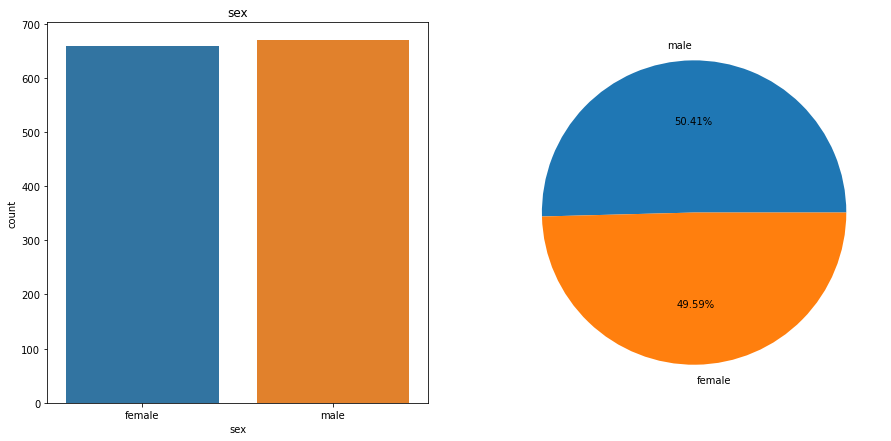

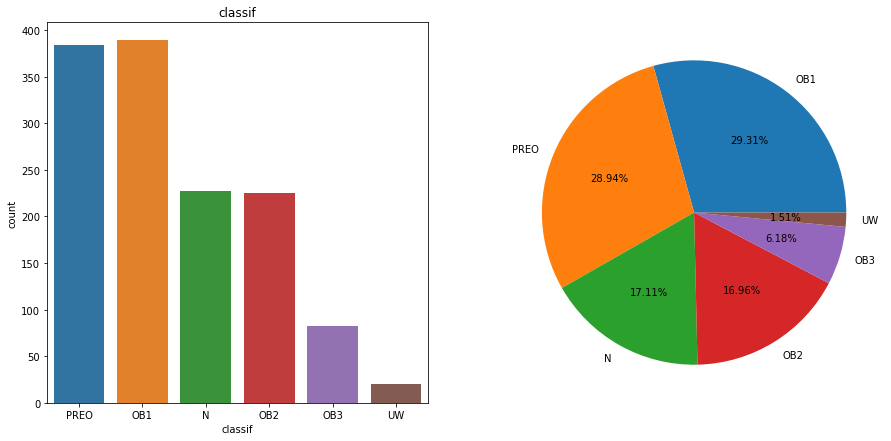

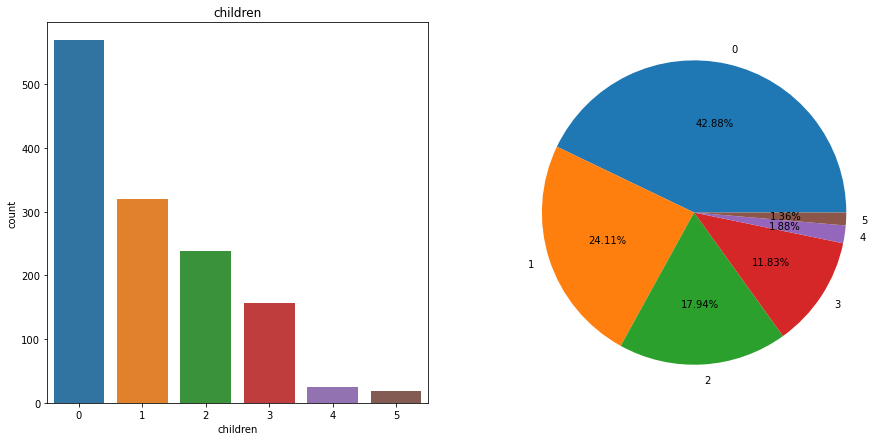

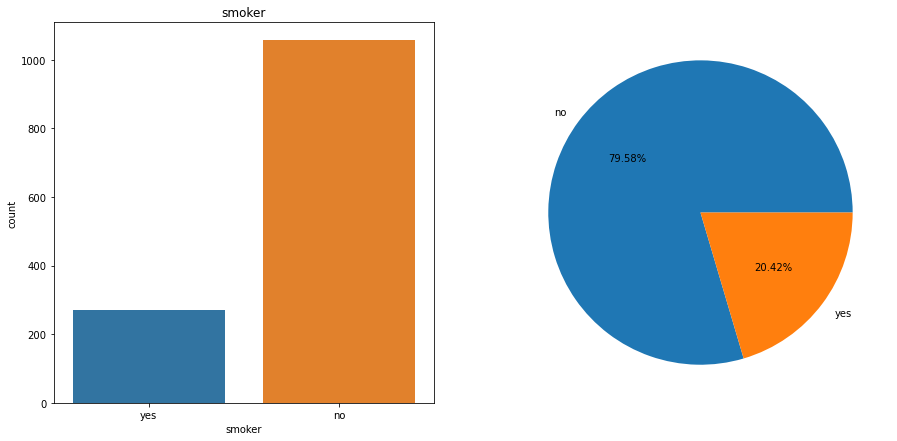

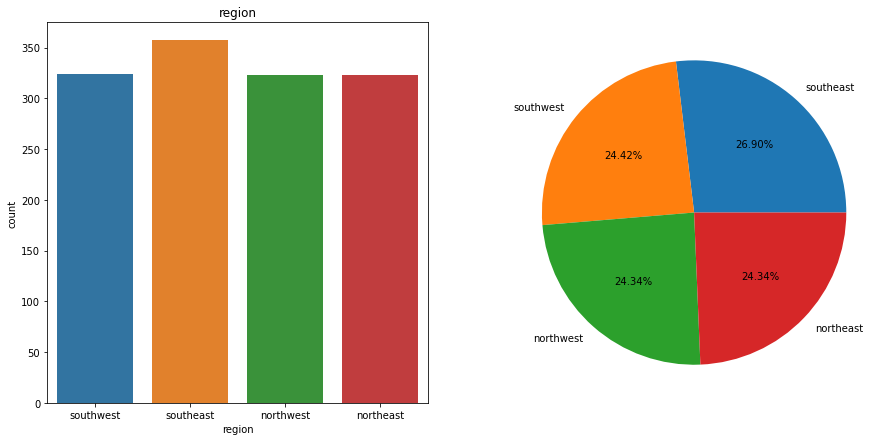

In [22]:
for i in categorical:
    fig,ax=plt.subplots(1,2,figsize=(15,7))
    ax[0].set_title(i)

    # counting the values
    percentage = data[i].value_counts()  
    
    # converting the index of the value counts into the list
    labels = list(data[i].value_counts().index) 

    sns.countplot(x=data[i],ax=ax[0])
    plt.pie(percentage,labels=labels,autopct="%0.2f%%")
    plt.show()

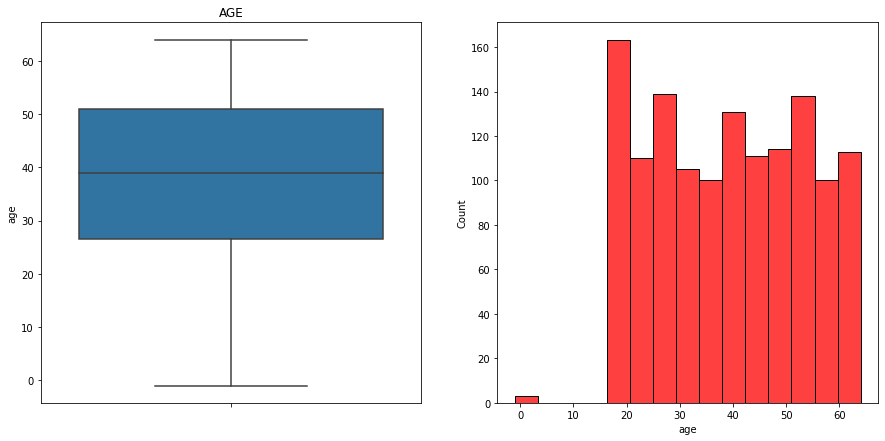

In [23]:
# plotting for numerical columns 

fig,ax=plt.subplots(1,2,figsize=(15,7))
sns.boxplot(y=data['age'],ax=ax[0]).set(title='AGE')
sns.histplot(x=data['age'],ax=ax[1],color='r')
plt.show()

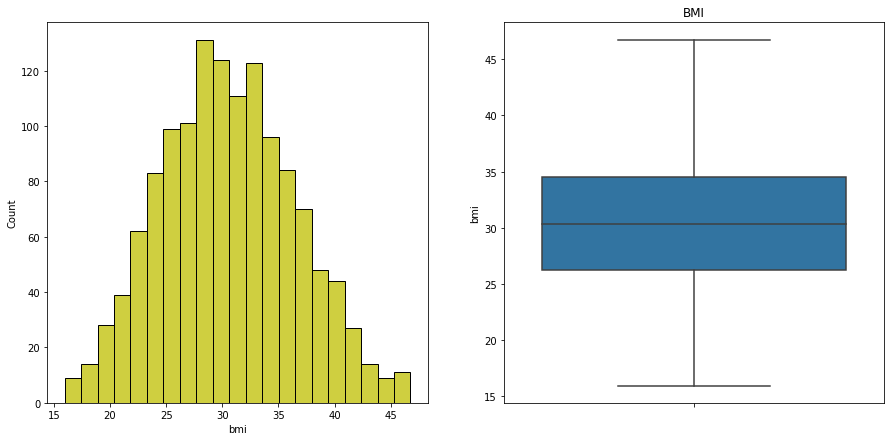

In [24]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
sns.histplot(x=data['bmi'],ax=ax[0],color='y')
sns.boxplot(y=data['bmi'],ax=ax[1]).set(title='BMI')
plt.show()

In [25]:
# checking correlation 

corr_table = data.corr()
corr_table

,age,bmi,children,charges
age,1.000000,0.119984,0.048281,0.293138
bmi,0.119984,1.000000,0.017366,0.193328
children,0.048281,0.017366,1.000000,0.068535
charges,0.293138,0.193328,0.068535,1.000000


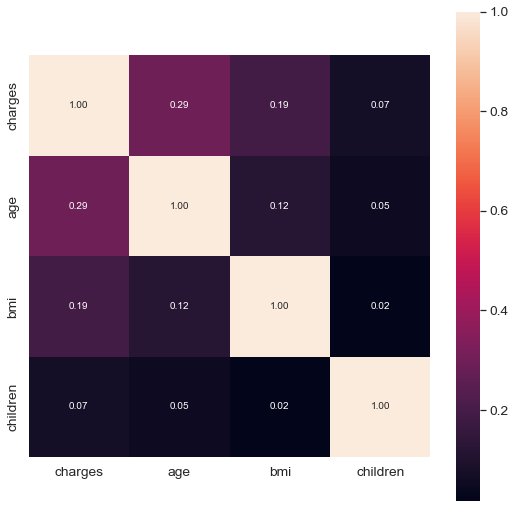

,Corr_value,Col_name
0,1.000000,charges
1,0.293138,age
2,0.193328,bmi
3,0.068535,children


In [26]:
def corr_col(dependent): 
    #saleprice correlation matrix
    k = len(corr_table.columns)
    cols = corr_table.nlargest(k, dependent)[dependent].index
    cm = np.corrcoef(data[cols].values.T)
    sns.set(font_scale=1.25)
    f, ax = plt.subplots(figsize=(9, 9))
    hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
    plt.show()
    
    d=zip(cm[0],cols)
    l_1=[]
    for _ in d:
        l_1.append(_)
    return(pd.DataFrame(l_1,columns=['Corr_value','Col_name']))

corr_col('charges')

In [27]:
# check for singularities

for i in data.columns:
        print("columns name = ",i)
        print(data[i].value_counts() / len(data))

columns name =  age
 18    0.051243
 19    0.049736
 50    0.021854
 51    0.021854
 48    0.021854
 20    0.021854
 45    0.021854
 21    0.021100
 26    0.021100
 53    0.021100
 52    0.021100
 27    0.021100
 24    0.021100
 25    0.021100
 49    0.021100
 47    0.021100
 46    0.021100
 28    0.021100
 54    0.020347
 44    0.020347
 43    0.020347
 40    0.020347
 42    0.020347
 29    0.020347
 41    0.020347
 22    0.020347
 31    0.020347
 23    0.020347
 30    0.020347
 57    0.019593
 55    0.019593
 32    0.019593
 34    0.019593
 56    0.019593
 36    0.018839
 33    0.018839
 39    0.018839
 38    0.018839
 59    0.018839
 35    0.018839
 37    0.018086
 62    0.017332
 60    0.017332
 63    0.017332
 58    0.017332
 61    0.016579
 64    0.016579
 0     0.001507
-1     0.000754
Name: age, dtype: float64
columns name =  sex
male      0.504145
female    0.495855
Name: sex, dtype: float64
columns name =  bmi
32.300    0.009797
28.310    0.006782
30.875    0.006029
28.880   

### Bivariate

<AxesSubplot:title={'center':'Premium charges with region'}, xlabel='region', ylabel='charges'>

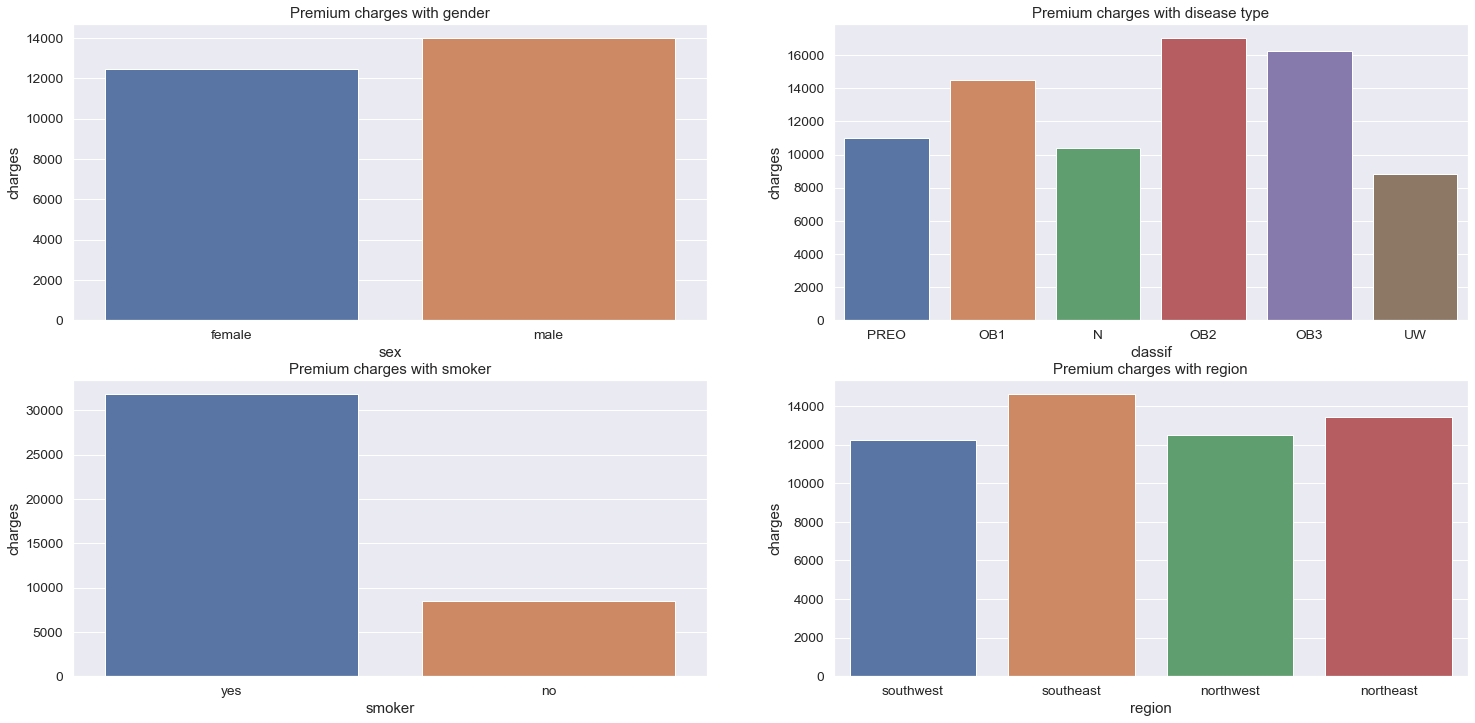

In [28]:
fig,ax = plt.subplots( 2,2,figsize=(25,12))
ax[0,0].set_title('Premium charges with gender')
ax[0,1].set_title('Premium charges with disease type')
ax[1,0].set_title('Premium charges with smoker')
ax[1,1].set_title('Premium charges with region')

sns.barplot(y=data['charges'], x=data['sex'],ci=None,ax=ax[0,0])
sns.barplot(y=data['charges'], x=data['classif'],ci=None,ax=ax[0,1])
sns.barplot(y=data['charges'], x=data['smoker'],ci=None,ax=ax[1,0])
sns.barplot(y=data['charges'], x=data['region'],ci=None,ax=ax[1,1])

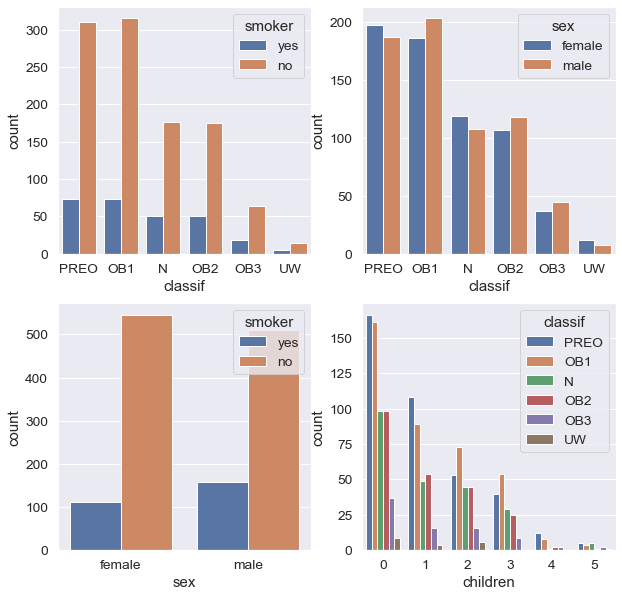

In [29]:
fig,ax=plt.subplots(2,2,figsize=(10,10))
sns.countplot(x='classif',hue='smoker',data=data,ax=ax[0,0])
ax[0,0].set_title('')
sns.countplot(x='classif',hue='sex',data=data,ax=ax[0,1])
ax[0,1].set_title('')
sns.countplot(x='sex',hue='smoker',data=data,ax=ax[1,0])
ax[1,0].set_title('')
sns.countplot(x='children',hue='classif',data=data,ax=ax[1,1])
ax[1,1].set_title('')
plt.show()                 

### Multivariate

C:\Users\KUSHAL SINGH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


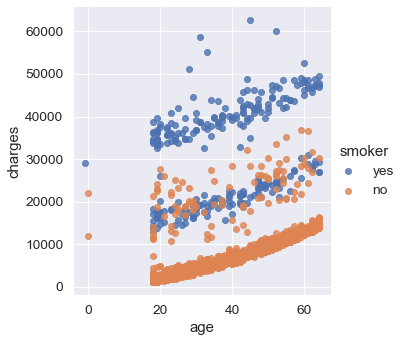

In [30]:
sns.lmplot("age", "charges", data, hue="smoker", fit_reg=False);

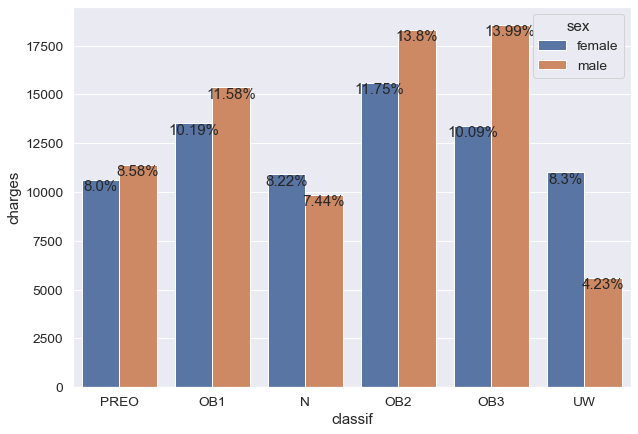

In [31]:
fig,ax= plt.subplots(figsize=(10,7))
sns.barplot(x=data['classif'],y=data['charges'],hue=data['sex'],ci=None,ax=ax)
count=len(data['smoker'])

for bar in ax.patches:
    percentage = f'{round((bar.get_height()/count),2)}%'
    
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(percentage,(x,y),ha='center',va='top')
    
plt.show()

# Step 8: Encoding categorical data


In [32]:
# creating dummies 

sex = pd.get_dummies(data.sex, prefix= 'sex')
smoker = pd.get_dummies(data.smoker, prefix= 'smoker')
classif = pd.get_dummies(data.classif, prefix= 'classif')
data=  pd.concat([data,sex,smoker,classif],axis='columns')

data

,age,sex,bmi,classif,children,smoker,region,charges,sex_female,sex_male,smoker_no,smoker_yes,classif_N,classif_OB1,classif_OB2,classif_OB3,classif_PREO,classif_UW
0,19,female,27.900,PREO,0,yes,southwest,16884.92400,1,0,0,1,0,0,0,0,1,0
1,18,male,33.770,OB1,1,no,southeast,1725.55230,0,1,1,0,0,1,0,0,0,0
2,28,male,33.000,OB1,3,no,southeast,4449.46200,0,1,1,0,0,1,0,0,0,0
3,0,male,22.705,N,0,no,northwest,21984.47061,0,1,1,0,1,0,0,0,0,0
4,32,male,28.880,PREO,0,no,northwest,3866.85520,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,OB1,3,no,northwest,10600.54830,0,1,1,0,0,1,0,0,0,0
1334,18,female,31.920,OB1,0,no,northeast,2205.98080,1,0,1,0,0,1,0,0,0,0
1335,18,female,36.850,OB2,0,no,southeast,1629.83350,1,0,1,0,0,0,1,0,0,0
1336,21,female,25.800,PREO,0,no,southwest,2007.94500,1,0,1,0,0,0,0,0,1,0


In [33]:
data = data.drop(['sex', 'smoker','classif','region'], axis = 1)

In [34]:
data

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,classif_N,classif_OB1,classif_OB2,classif_OB3,classif_PREO,classif_UW
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,0,1,0
1,18,33.770,1,1725.55230,0,1,1,0,0,1,0,0,0,0
2,28,33.000,3,4449.46200,0,1,1,0,0,1,0,0,0,0
3,0,22.705,0,21984.47061,0,1,1,0,1,0,0,0,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,0,1,0,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0,0,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,0,1,0


# Step 9: Feature scaling

In [35]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

scale_columns = ["age","bmi",'charges']
data[scale_columns] = std_scaler.fit_transform(data[scale_columns])

data

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,classif_N,classif_OB1,classif_OB2,classif_OB3,classif_PREO,classif_UW
0,-1.423526,-0.445333,0,0.304787,1,0,0,1,0,0,0,0,1,0
1,-1.494281,0.545857,1,-0.959160,0,1,1,0,0,1,0,0,0,0
2,-0.786730,0.415837,3,-0.732048,0,1,1,0,0,1,0,0,0,0
3,-2.767872,-1.322544,0,0.729973,0,1,1,0,1,0,0,0,0,0
4,-0.503710,-0.279853,0,-0.780624,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.769881,0.073058,3,-0.219187,0,1,1,0,0,1,0,0,0,0
1334,-1.494281,0.233472,0,-0.919103,1,0,1,0,0,1,0,0,0,0
1335,-1.494281,1.065936,0,-0.967141,1,0,1,0,0,0,1,0,0,0
1336,-1.282015,-0.799932,0,-0.935615,1,0,1,0,0,0,0,0,1,0


# Step 10: Splitting the dataset into the training and test sets

In [36]:
# splitting data into x and y

target_names='charges'

y=data[target_names]
x=data.drop(target_names, axis=1)

In [37]:
x

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,classif_N,classif_OB1,classif_OB2,classif_OB3,classif_PREO,classif_UW
0,-1.423526,-0.445333,0,1,0,0,1,0,0,0,0,1,0
1,-1.494281,0.545857,1,0,1,1,0,0,1,0,0,0,0
2,-0.786730,0.415837,3,0,1,1,0,0,1,0,0,0,0
3,-2.767872,-1.322544,0,0,1,1,0,1,0,0,0,0,0
4,-0.503710,-0.279853,0,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.769881,0.073058,3,0,1,1,0,0,1,0,0,0,0
1334,-1.494281,0.233472,0,1,0,1,0,0,1,0,0,0,0
1335,-1.494281,1.065936,0,1,0,1,0,0,0,1,0,0,0
1336,-1.282015,-0.799932,0,1,0,1,0,0,0,0,0,1,0


In [38]:
y

0       0.304787
1      -0.959160
2      -0.732048
3       0.729973
4      -0.780624
          ...   
1333   -0.219187
1334   -0.919103
1335   -0.967141
1336   -0.935615
1337    1.326695
Name: charges, Length: 1327, dtype: float64

In [39]:
# splitting data into train and test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

In [40]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [41]:
y_test_predicted = model.predict(x_test)
pd.DataFrame(y_test_predicted)

,0
0,-0.641177
1,-0.827390
2,-0.727011
3,-0.527527
4,1.074619
...,...
394,-0.329980
395,-0.062155
396,-0.736588
397,0.236306


In [42]:
# calculating mean square error

print("MSE =",mean_squared_error(y_test_predicted,y_test))

MSE = 0.26495097556914315


In [43]:
# predicting the accuracy score

score=r2_score(y_test,y_test_predicted)
print("r2 socre is ",score)

r2 socre is  0.7592810592458561


In [44]:
# summary of Regression Model

import statsmodels.api as sm
model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     396.8
Date:                Thu, 21 Apr 2022   Prob (F-statistic):               0.00
Time:                        15:11:33   Log-Likelihood:                -960.67
No. Observations:                1327   AIC:                             1943.
Df Residuals:                    1316   BIC:                             2000.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
age              0.2940      0.014     21.145      0.000       0.267       0.321
bmi              0.0174      0.055      0.315      0.753      -0.091       0.125
children         0.0397      0.011      3.465      0.001       0.017       0.062
sex_female       0.2245      0.019     12.088      0.000       0.188       0.261
sex_male         0.2181      0.018     11.802      0.000       0.182       0.254
smoker_no       -0.7640      0.017    -44.128      0.000      -0.798      -0.730
smoker_yes       1.2066      0.024     49.609      0.000       1.159       1.254
classif_N       -0.0983      0.077     -1.274      0.203      -0.250       0.053
classif_OB1      0.2139      0.036      5.902      0.000       0.143       0.285
classif_OB2      0.3025      0.075      4.049      0.000       0.156       0.449
classif_OB3      0.2482      0.126      1.976      0.048       0.002       0.495
classif_PREO    -0.0452      0.037     -1.217      0.224      -0.118       0.028
classif_UW      -0.1784      0.151     -1.180      0.238      -0.475       0.118
==============================================================================
Omnibus:                      327.144   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              820.479
Skew:                           1.307   Prob(JB):                    6.84e-179
Kurtosis:                       5.830   Cond. No.                     3.04e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.02e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Step 11: Building Models

In [45]:
L_1=[0.15,0.20,0.25,0.30,0.35]
L_2=[0,1,2,3,4]

for i in L_1:
    for j in L_2:
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=i, random_state=j) 
        model=LinearRegression()
        model.fit(x_train,y_train)
        y_test_predicted=model.predict(x_test)
        print("MSE =",mean_squared_error(y_test_predicted,y_test))
        
        
        # predicting the accuracy score
        score=r2_score(y_test,y_test_predicted)
        print("r2 score is ",score)
        print("test_size={},random_state={}".format(i,j))
        print("--"*35)

MSE = 0.2868264410061902
r2 score is  0.7055039754596957
test_size=0.15,random_state=0
----------------------------------------------------------------------
MSE = 0.2228921049415128
r2 score is  0.7351259234458638
test_size=0.15,random_state=1
----------------------------------------------------------------------
MSE = 0.24640679390622242
r2 score is  0.7279894390978294
test_size=0.15,random_state=2
----------------------------------------------------------------------
MSE = 0.3257789150461252
r2 score is  0.6967215182936448
test_size=0.15,random_state=3
----------------------------------------------------------------------
MSE = 0.22981594591598495
r2 score is  0.7591901749015924
test_size=0.15,random_state=4
----------------------------------------------------------------------
MSE = 0.28451971956733085
r2 score is  0.7332823530450724
test_size=0.2,random_state=0
----------------------------------------------------------------------
MSE = 0.20318309328845371
r2 score is  0.765224032

In [46]:
# here we are again training and testing data with test size = 0.2 and random state = 1

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) 
model=LinearRegression()
model.fit(x_train,y_train)
y_test_predicted=model.predict(x_test)
print("MSE =",mean_squared_error(y_test_predicted,y_test))

# predicting the accuracy score

score=r2_score(y_test,y_test_predicted)
print("r2 score is ",score)
print("test_size={},random_state={}".format(0.2,1))
print("--"*35)

MSE = 0.20318309328845371
r2 score is  0.7652240320977787
test_size=0.2,random_state=1
----------------------------------------------------------------------


In [47]:
mse_LR = mean_squared_error(y_test_predicted,y_test)
r2_LR = r2_score(y_test,y_test_predicted)

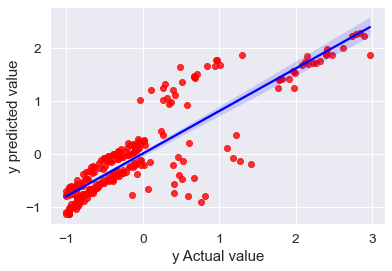

In [48]:
sns.regplot(x=y_test, y=y_test_predicted,scatter_kws={"color": "red"}, line_kws={"color": "blue"})
plt.xlabel('y Actual value')
plt.ylabel('y predicted value')
plt.show()

### Lasso Regression

In [49]:
myLasso = Lasso(alpha=0.01).fit(x_train,y_train)
prediction_lasso = myLasso.predict(x_test)
mean_squared_error(y_test,prediction_lasso)

0.19978877997926492

In [50]:
print("R-square of the entire data:",myLasso.score(x_test,y_test))

R-square of the entire data: 0.7691461261048664


In [51]:
mse_lasso = mean_squared_error(y_test,prediction_lasso)
r2_lasso = myLasso.score(x_test,y_test)

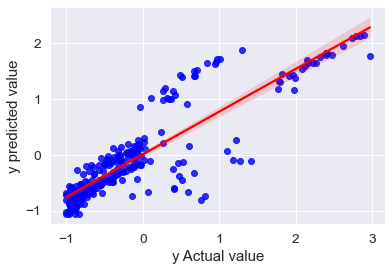

In [52]:
sns.regplot(x=y_test, y=prediction_lasso,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.xlabel('y Actual value')
plt.ylabel('y predicted value')
plt.show()

### Random Forest 

In [53]:
model=RandomForestRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([-2.43665462e-01, -8.00450225e-01, -7.56008740e-01, -7.13013109e-02,
       -3.00583022e-01,  2.33868460e+00,  1.38144615e-02, -9.09734482e-01,
       -7.27506777e-01, -2.68859274e-01,  1.75542896e+00, -8.84164224e-01,
       -4.84827150e-01, -7.84425935e-01,  2.18003616e+00, -8.39421875e-01,
       -1.30360574e-01,  2.52719138e+00, -9.17140772e-01, -6.98290527e-02,
       -6.73294320e-01, -3.14626406e-02, -4.35271423e-01, -9.69611613e-01,
       -1.16061496e-01, -1.70198073e-01, -4.69016341e-01, -8.72006246e-01,
       -9.31750531e-01, -7.74139630e-01,  2.15604862e+00, -5.59805774e-01,
       -9.06814584e-01,  2.73600580e+00, -7.45980800e-01,  2.08539588e-01,
       -6.18159020e-01,  8.16171922e-01, -7.38855801e-04, -8.75086708e-01,
        2.24645399e+00, -3.08517806e-01,  7.96678475e-01, -9.31025488e-01,
        1.42769856e-01,  5.35874226e-01,  5.67325130e-01, -9.60934116e-01,
        2.50085270e-01, -2.87947427e-01, -7.46276819e-01, -7.50459904e-01,
       -2.86596200e-01,  

In [54]:
# predicting the accuracy score

score=r2_score(y_test,y_pred)
print("r2 score is ",score)

r2 score is  0.8124384088336964


In [55]:
mse_RF = mean_squared_error(y_test,y_pred)
r2_RF = r2_score(y_test,y_pred)

### Ridge Regression

In [56]:
theRidge = Ridge(alpha=1).fit(x_train,y_train)
y_predict_rigid = theRidge.predict(x_test)

print("the score of the entire data is :",theRidge.score(x_test,y_test))

the score of the entire data is : 0.7659110894428618


In [57]:
mean_squared_error(y_test,y_predict_rigid)

0.20258849053635825

In [58]:
mse_ridge=mean_squared_error(y_test,y_predict_rigid)
r2_ridge=theRidge.score(x_test,y_test)

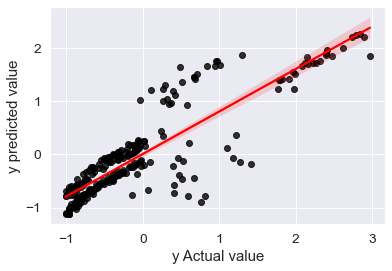

In [59]:
sns.regplot(x=y_test, y=y_predict_rigid,scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.xlabel('y Actual value')
plt.ylabel('y predicted value')
plt.show()

In [60]:
dtm = DecisionTreeRegressor(max_depth=4,min_samples_split=5,max_leaf_nodes=10)

dtm.fit(x_train,y_train)
print("R-Squared on train dataset={}".format(dtm.score(x_train,y_train)))

R-Squared on train dataset=0.8596896762627846


### Decision Tree Regression

In [61]:
dtm.fit(x_test,y_test)
print("R-Squared on test dataset={}".format(dtm.score(x_test,y_test)))

R-Squared on test dataset=0.8743543886635231


In [62]:
mse_dt = mean_absolute_error(y_test, y_test_predicted)

In [63]:
r2_DT=dtm.score(x_train,y_train)

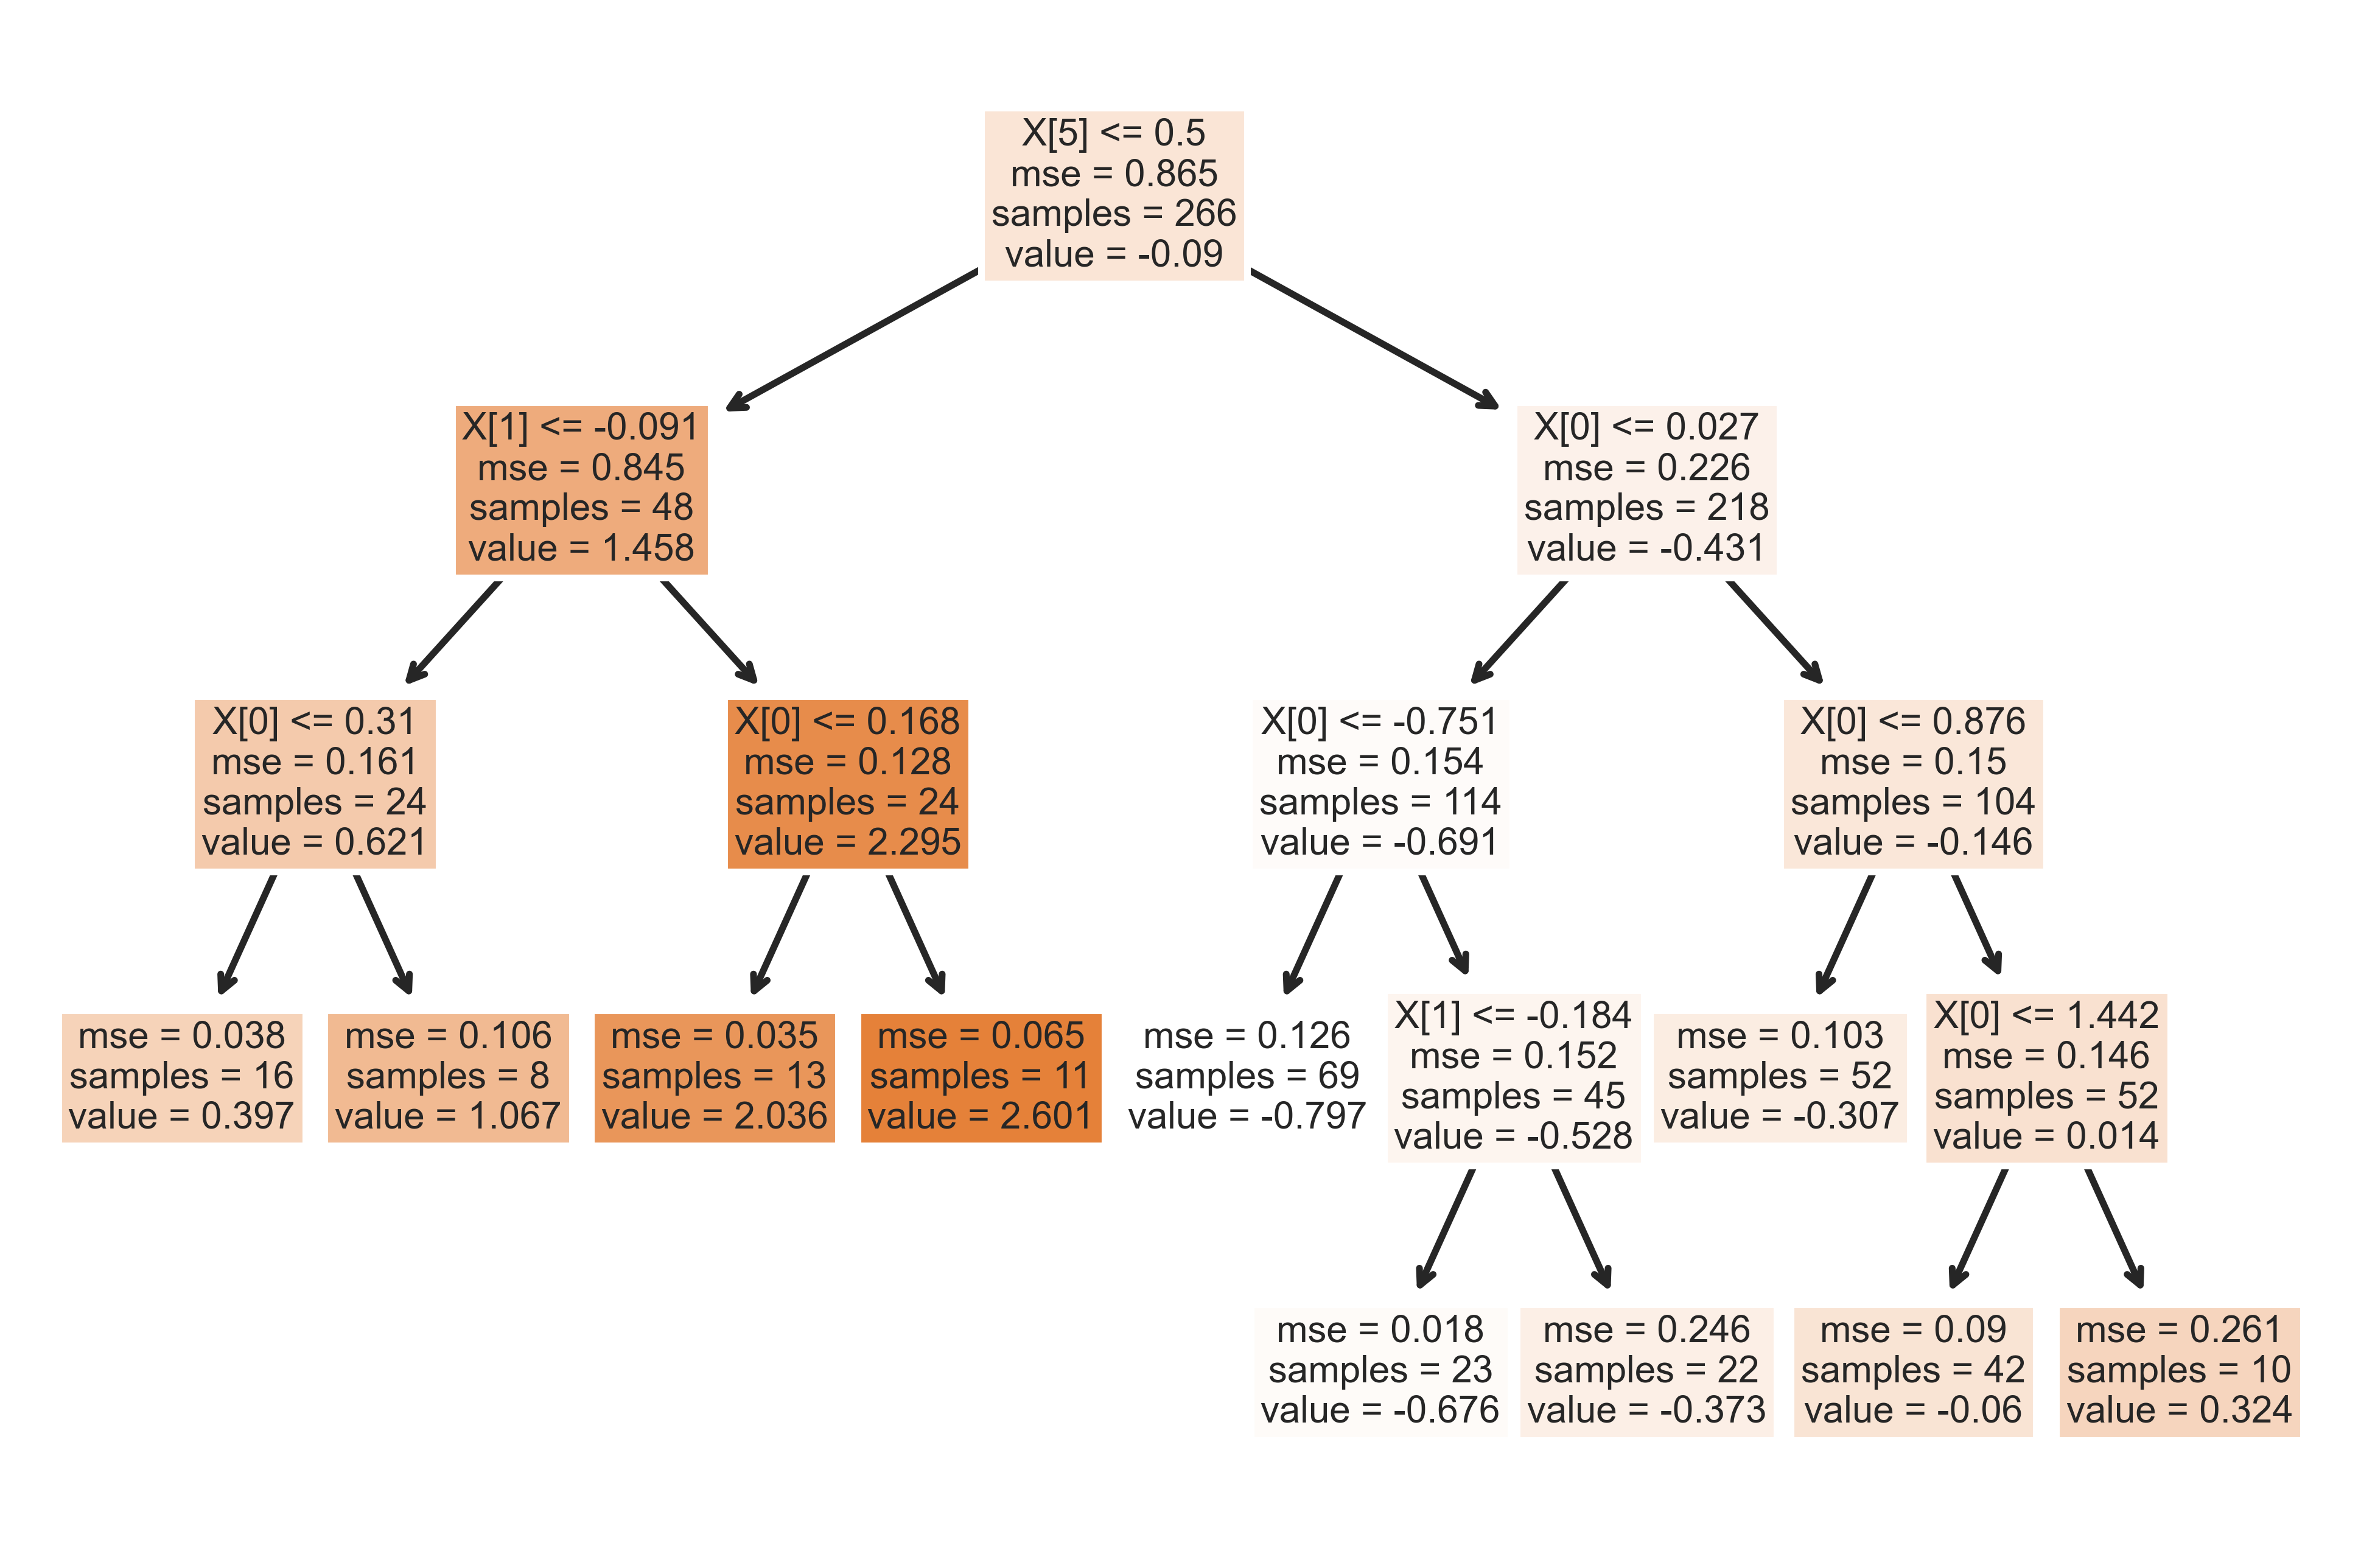

In [64]:
# Setting dpi = 800 to make image clearer than default

fig, axes = plt.subplots(dpi=800)

tree.plot_tree(dtm,
           filled = True);

### KNN

In [65]:
k=[]
accuracy=[]
for i in np.arange(1,20,2):
    model = KNeighborsRegressor(n_neighbors=i)
    
    model.fit(x_train, y_train)
    Y_pred = model.predict(x_test)
    acc_log = round(model.score(x_train, y_train) * 100, 2)
    k.append(i)
    accuracy.append(acc_log)

print(k)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]


In [66]:
d=dict(zip(k,accuracy))
d

{1: 99.77,
 3: 88.61,
 5: 85.68,
 7: 84.01,
 9: 82.0,
 11: 80.31,
 13: 79.01,
 15: 76.74,
 17: 75.08,
 19: 73.34}

### Finding max k values

In [67]:
max_key = max(d, key=d.get)
print(max_key)

1


In [68]:
model = KNeighborsRegressor(n_neighbors=3)
    
model.fit(x_train, y_train)
Y_pred = model.predict(x_test)
acc_log = round(model.score(x_train, y_train) * 100, 2)
acc_log

88.61

In [69]:
mse_knn=metrics.mean_absolute_error(y_test,Y_pred )

In [70]:
acc_KNN = model.score(x_train, y_train)

### Final comparision of all the models.

In [71]:
DF_comp=pd.DataFrame({'MSE':[mse_LR,mse_ridge,mse_lasso,mse_RF,mse_dt,mse_knn],'R2':[r2_LR,r2_ridge,r2_lasso,r2_DT,r2_RF,acc_KNN]})
DF_comp = DF_comp.rename(index={0: "Linear Regression" ,1:"Ridge Regression",2:"Lasso Regression",3:"Random Forest",4:"Decision Tree",5:"KNN"})
DF_comp

,MSE,R2
Linear Regression,0.203183,0.765224
Ridge Regression,0.202588,0.765911
Lasso Regression,0.199789,0.769146
Random Forest,0.162322,0.837146
Decision Tree,0.316037,0.812438
KNN,0.246363,0.886070


After comparing all the models we can conclude that Random Forest Regressor model is best as MSE is low i.e 0.16 as compare to other models and r2 is 0.83 which is a good model.